In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras import models
from tensorflow.keras import layers



Generate some dummy data for training

In [54]:
np.random.seed(42)  # For reproducibility
x_train = np.random.rand(100, 2)  # 100 samples, 2 features
y_train = (x_train[:, 0] > x_train[:, 1]).astype(int)  # Binary labels based on a simple rule

Splitting the data into training and testing sets for evaluation

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

GBM Model

In [56]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbm.fit(X_train, Y_train)
gbm_predictions = gbm.predict(X_test)
gbm_accuracy = accuracy_score(Y_test, gbm_predictions)
print(f"GBM Accuracy: {gbm_accuracy}")

GBM Accuracy: 0.9


Calculate precision and recall for GBM

In [57]:
gbm_precision = precision_score(Y_test, gbm_predictions)
gbm_recall = recall_score(Y_test, gbm_predictions)

Display precision and recall for GBM

In [58]:
print(f"GBM Precision: {gbm_precision}")
print(f"GBM Recall: {gbm_recall}")

GBM Precision: 0.9090909090909091
GBM Recall: 0.9090909090909091


ANN Model

In [59]:
model = models.Sequential([
    layers.Dense(3, activation='relu', input_shape=(2,)),  # First hidden layer with 50 nodes
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=10, validation_data=(X_test, Y_test), verbose=0)
ann_predictions = (model.predict(X_test) > 0.5).astype(int)
ann_accuracy = accuracy_score(Y_test, ann_predictions)
print(f"ANN Accuracy: {ann_accuracy}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
ANN Accuracy: 0.95


Calculate precision and recall for ANN

In [60]:
ann_precision = precision_score(Y_test, ann_predictions)
ann_recall = recall_score(Y_test, ann_predictions)

Display precision and recall for ANN

In [61]:
print(f"ANN Precision: {ann_precision}")
print(f"ANN Recall: {ann_recall}")

ANN Precision: 0.9166666666666666
ANN Recall: 1.0


Prepare meshgrid for decision boundaries

In [62]:
x_min, x_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
y_min, y_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

GBM decision boundary

In [63]:
Z_gbm = gbm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gbm = Z_gbm.reshape(xx.shape)

ANN decision boundary

In [64]:
Z_ann = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ann = (Z_ann > 0.5).astype(int)
Z_ann = Z_ann.reshape(xx.shape)

  1/439 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step

439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


Plotting

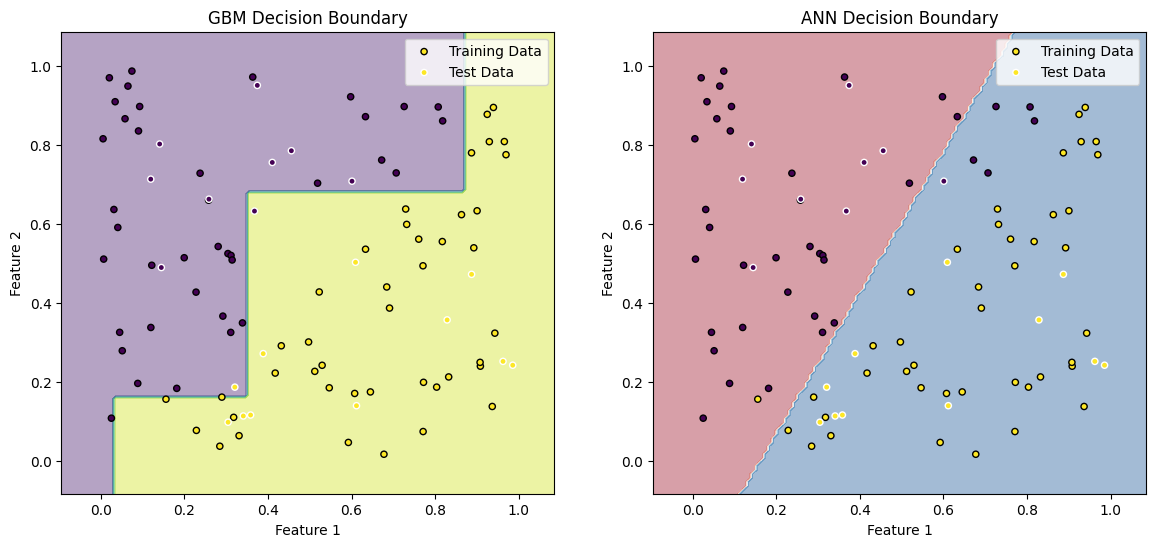

In [65]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# GBM Decision Boundary
ax[0].contourf(xx, yy, Z_gbm, alpha=0.4)
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, edgecolor='k', label='Training Data')
ax[0].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=20, edgecolor='w', label='Test Data')
ax[0].set_title('GBM Decision Boundary')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].legend()

# ANN Decision Boundary
ax[1].contourf(xx, yy, Z_ann, alpha=0.4, cmap='RdBu')
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=20, edgecolor='k', label='Training Data')
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s=20, edgecolor='w', label='Test Data')
ax[1].set_title('ANN Decision Boundary')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].legend()

plt.show()